# Experiment №1

## Planing

Мы запускаем модель с размером поля 100 на 100 и зерном равынм 2, изменяя 4 параметра:
количество жертв, количество хищников, интервал роста травы и количество травы.

In [28]:
import numpy as np

agents = np.arange(0, 8001, 400)
agents[0] = 1
agents[20] = 7999

intervals = np.arange(0, 101, 10)
intervals[0] = 1

amount = np.arange(0, 501, 50)
amount[0] = 1

print(amount)
print(agents)
print(intervals)

[  1  50 100 150 200 250 300 350 400 450 500]
[   1  400  800 1200 1600 2000 2400 2800 3200 3600 4000 4400 4800 5200 5600
 6000 6400 6800 7200 7600 7999]
[  1  10  20  30  40  50  60  70  80  90 100]


На графиках ниже точками изображены те значения параметров, которые мы берем:

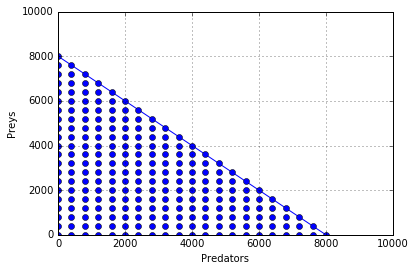

In [29]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

pltdata = [[],[]]

for a in agents :
    for b in agents:
        if b <= a:
            pltdata[0].append(8000-a)
            pltdata[1].append(b)

fig = plt.figure()
#fig.set_size_inches(10, 8)
plt.plot(agents, 8000 - agents, 'b')
plt.plot(pltdata[0], pltdata[1], 'bo')
plt.grid(True)
plt.xlabel("Predators")
plt.ylabel("Preys")
plt.xlim(0, 10000)
plt.ylim(0, 10000)
plt.show()

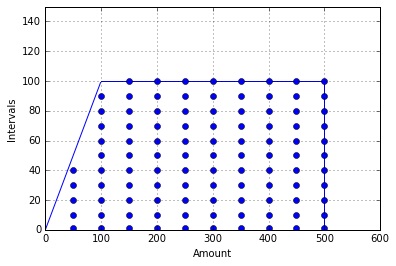

In [30]:
pltdata = [[],[]]

for a in amount :
    for b in intervals:
        if float(a)/float(b) > 1:
            pltdata[0].append(a)
            pltdata[1].append(b)
            
fig = plt.figure()
#fig.set_size_inches(10, 8)
plt.plot(np.linspace(max(amount),max(amount),11), intervals, 'b')
plt.plot(amount[2:], np.linspace(max(intervals),max(intervals), 9), 'b')
plt.plot(pltdata[0], pltdata[1], 'bo')
plt.plot(np.arange(100),np.arange(100), 'b')
plt.grid(True)
plt.xlabel("Amount")
plt.ylabel("Intervals")
plt.xlim(0, 600)
plt.ylim(0, 150)
plt.show()

## Execute

Производиться 23793 запуска модели с различными параметрами.

In [31]:
from ppmodel import ModelParams

params = []
args = [[],[],[],[]]
for d in agents:
    for y in agents:
        if (d + y) <= 8000:
            for i in intervals:
                for a in amount:
                    if (float(a)/float(i)) > 1:
                        args[0].append(d)
                        args[1].append(y)
                        args[2].append(a)
                        args[3].append(i)
                        params.append(ModelParams("S", 100, 100, d, y, a, i, 2))
print(len(params))

23793


In [32]:
import ppmodel
from multiprocessing import Pool 

data = []

try:
    
    file = open("results_e1.csv", 'r')
    
except IOError as e:
    print("Launch model")
    if __name__ == '__main__':
        p = Pool(6)
        data = p.map(ppmodel.f, params)

    f = open("results_e1.csv", 'w')
    for i in range(0, len(data)):
        f.write(str(args[0][i])+','+str(args[1][i])+','+str(args[2][i])+','+str(args[3][i])+','+str(data[i])+"\n")
    f.close()
else:
    print("Read file")
    args = [[],[],[],[]]
    for line in file:
        parts = line.split(',')
        args[0].append(int(parts[0]))
        args[1].append(int(parts[1]))
        args[2].append(int(parts[2]))
        args[3].append(int(parts[3]))
        data.append(int(parts[4]))
        
    file.close()

Read file


## Results

Найдем максимальное параметры с которыми модель прожила максимальное количество шагов.

In [33]:
dm = data[0]
index = 0;
for i in range(0, len(data)):
    if data[i] > dm:
        dm = data[i]
        index = i;
print(str(args[0][index])+','+str(args[1][index])+','+str(args[2][index])+','+str(args[3][index])+','+str(data[index]))
print(index)

1,1200,50,20,10757
329


Зафиксируем количество жертв и хищников и будем менять количество и интервалы подачи травы. Визуализируем полученный результат.

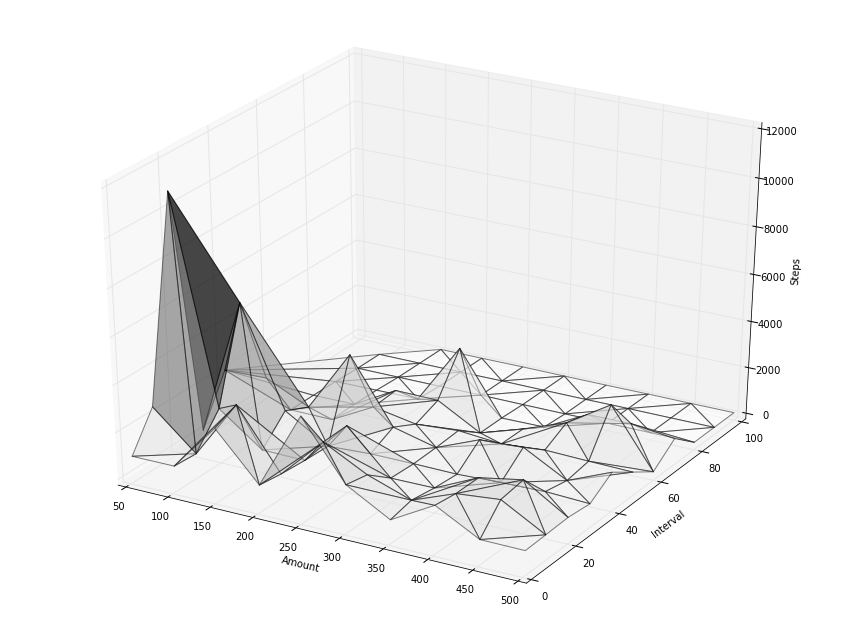

In [34]:
from matplotlib import pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

x = []
y = []
z = []
for i in range(0, len(data)):
    if args[0][i] == 1 and args[1][i] == 1200:
        x.append(args[2][i])
        y.append(args[3][i])
        z.append(data[i])
        

fig = plt.figure()
fig.set_size_inches(15, 11)
ax = fig.gca(projection='3d')
ax.plot_trisurf(x, y, z, alpha=0.5, cmap=cm.Greys)
ax.set_xlabel('Amount')
ax.set_ylabel('Interval')
ax.set_zlabel('Steps')
#a = ax.xaxis
#a.set_ticks([1,100,200,300,400,500])
# ax.tick_params(axis='x', labelsize=24)
plt.show()

На графике видна область, где количество шагов жизни модели довольно велико.

Аналогично зафиксируем количество и интервалы подачи травы и будем менять количество жертв и хищников. Визуализируем полученный результат.

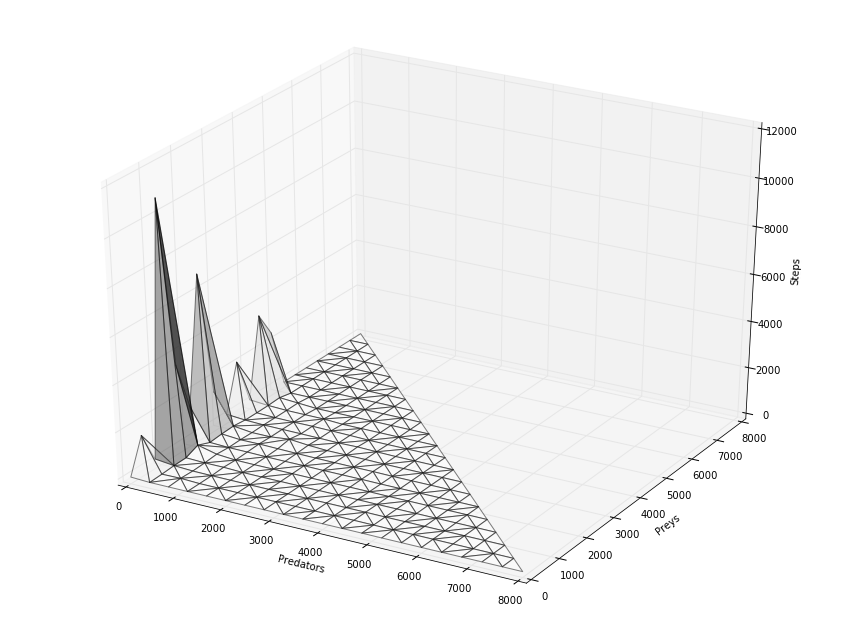

In [35]:
x = []
y = []
z = []
for i in range(0, len(data)):
    if args[2][i] == 50 and args[3][i] == 20:
        x.append(args[0][i])
        y.append(args[1][i])
        z.append(data[i])
        
        
fig = plt.figure()
fig.set_size_inches(15, 11)
ax = fig.gca(projection='3d')
ax.plot_trisurf(x, y, z, alpha=0.5, cmap=cm.Greys)
ax.set_xlabel('Predators')
ax.set_ylabel('Preys')
ax.set_zlabel('Steps')
# a = ax.xaxis
# a.set_ticks([1,2000,4000,6000,8000])
# a = ax.yaxis
# a.set_ticks([1,2000,4000,6000,8000])
# a = ax.zaxis
# a.set_ticks([1,2000,4000,6000,8000,10000,12000])
plt.show()

Как мы видим, на графике заметна область, где длительность жизнь модели велика.

Найдем второе по велечине значение длительности жизни и повторим все действия.

In [36]:
dm2 = data[0]
index2 = 0;
for i in range(0, len(data)):
    if data[i] > dm2 and data[i] != dm:
        dm2 = data[i]
        index2 = i;
print(str(args[0][index2])+','+str(args[1][index2])+','+str(args[2][index2])+','+str(args[3][index2])+','+str(data[index2]))
print(index)

1,3600,100,40,9209
329


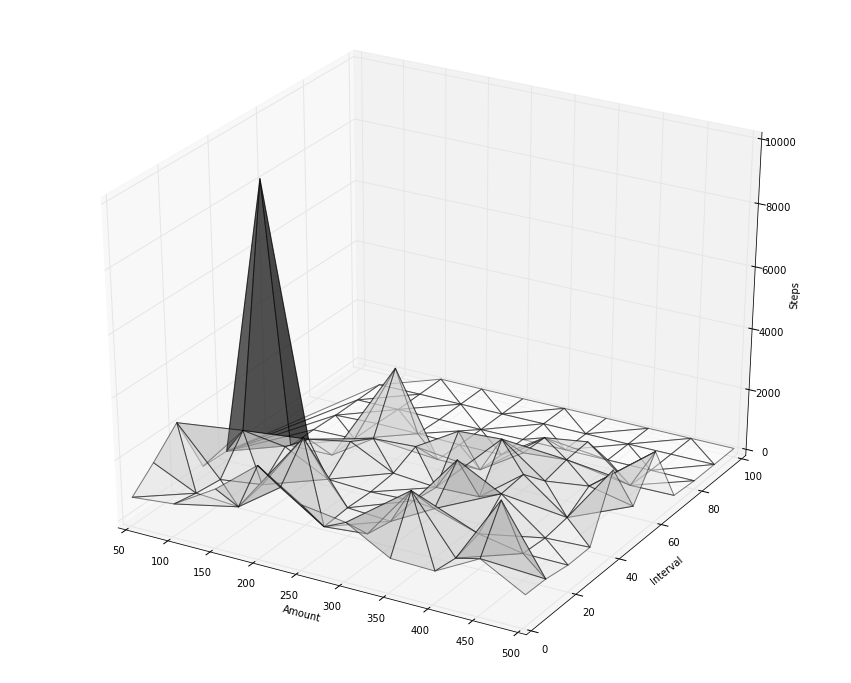

In [37]:
x = []
y = []
z = []
for i in range(0, len(data)):
    if args[0][i] == 1 and args[1][i] == 3600:
        x.append(args[2][i])
        y.append(args[3][i])
        z.append(data[i])

fig = plt.figure()
fig.set_size_inches(15, 12)
ax = fig.gca(projection='3d')
ax.plot_trisurf(x, y, z, alpha=0.5, cmap=cm.Greys)
ax.set_xlabel('Amount')
ax.set_ylabel('Interval')
ax.set_zlabel('Steps')
# a = ax.xaxis
# a.set_ticks([1,100,200,300,400,500])
plt.show()

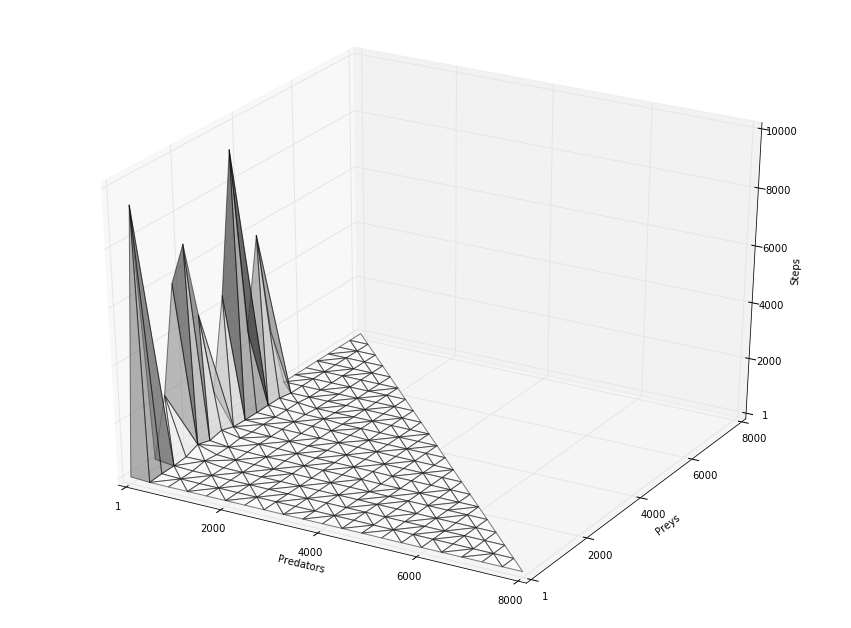

In [38]:
x = []
y = []
z = []
for i in range(0, len(data)):
    if args[2][i] == 100 and args[3][i] == 40:
        x.append(args[0][i])
        y.append(args[1][i])
        z.append(data[i])
        
        
fig = plt.figure()
fig.set_size_inches(15, 11)
ax = fig.gca(projection='3d')
ax.plot_trisurf(x, y, z, alpha=0.5, cmap=cm.Greys)
ax.set_xlabel('Predators')
ax.set_ylabel('Preys')
ax.set_zlabel('Steps')
a = ax.xaxis
a.set_ticks([1,2000,4000,6000,8000])
a = ax.yaxis
a.set_ticks([1,2000,4000,6000,8000])
a = ax.zaxis
a.set_ticks([1,2000,4000,6000,8000,10000])
plt.show()

Результаты оказались схожи, что позволяет говорить о их достоверности.

Найдем несоклько наборов параметров, при которых модель жила дольше всего.

In [39]:
import numpy as np

aver = []
aver2 = []
for i in range(0, len(data)):
    if data[i] > 7000: 
        index2 = i;
        print(str(args[0][index2])+','+str(args[1][index2])+','+str(args[2][index2])+','+str(args[3][index2])+','+str(data[index2])+','+str(args[2][index2]/args[3][index2]))
        aver.append(args[2][index2]/args[3][index2])
        aver2.append(args[1][index2]/args[0][index2])

print(np.average(aver))
print(np.average(aver2))

1,400,100,40,9187,2.5
1,1200,50,20,10757,2.5
1,3600,100,40,9209,2.5
1,4400,100,50,7591,2.0
2.375
2400.0


На основе полученных данных можно сделать вывод, что модель живет дольше всего когда количество жертв значительно превышает количество хищников, а соотношение травы примерно равно 5/2.